## [教學重點]
學習使用 sklearn 中的 linear regression 模型，並理解各項參數的意義

## [範例重點]
觀察丟進模型訓練的資料格式，輸入 linear regression 與 Logistic regression 的資料有甚麼不同?

## import 需要的套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Linear regssion

In [8]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = diabetes.data[:, np.newaxis, 2]
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

Data shape:  (442, 1)


In [9]:
y_train

array([111., 168.,  78., 293., 172.,  71.,  94., 262.,  99.,  65., 232.,
       125., 101., 202., 237.,  74., 128., 128., 336.,  87., 122.,  65.,
       292., 248.,  48.,  95., 184., 185., 192., 206., 268., 118., 139.,
       202., 141., 200., 265., 172., 202.,  52.,  70., 232., 150.,  93.,
       173., 120.,  65., 332., 107.,  84.,  48.,  87.,  53., 158.,  71.,
       121., 244., 131., 152.,  72., 118., 210., 140., 170.,  49., 262.,
        61.,  53.,  52.,  63., 181., 103., 277., 235.,  97.,  88., 197.,
       152., 187.,  92., 150.,  75., 131., 104., 160., 127., 243.,  40.,
        61., 179.,  53., 109.,  49., 281., 257., 306., 115.,  88., 252.,
       283.,  79., 200., 275.,  96., 259.,  77., 103.,  42.,  60., 246.,
       110., 310., 111., 147., 190., 196.,  91.,  95., 265., 274., 116.,
       116.,  83., 122., 270., 230., 275., 310.,  67., 104., 280., 166.,
        94., 243., 164.,  90.,  85., 195., 177., 221., 102., 233., 249.,
        90.,  72., 214., 144.,  60., 270., 220.,  6

In [10]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [934.05431907]
Mean squared error: 2569.69


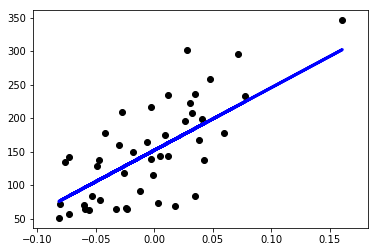

In [11]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

### Logistics regression

In [13]:
import warnings
warnings.filterwarnings('ignore')

# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

In [14]:
y_train

array([0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2,
       1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 2])

In [7]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8666666666666667


## [作業重點]
了解其他資料集的使用方法，如何將資料正確地送進模型訓練

## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

In [8]:
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！